In [1]:
%matplotlib notebook
%matplotlib inline

import pandas as pd
import numpy as np
import random
import requests
import json
import time
import matplotlib.pyplot as plt

from scipy import stats
from citipy import citipy
from config import wkey


In [2]:
#Num of samples for project

smpl = 700
# create a list of lat and lngs
slat = np.random.uniform(low=-90.000, high=90.000, size=smpl)
slng = np.random.uniform(low=-180.000, high=180.000, size=smpl)


#add list to dict then start a dataframe
samples = {
    'rand_lat':slat,
    'rand_lng':slng
          }

df1 = pd.DataFrame(samples)
df1.shape
df1.head()


,rand_lat,rand_lng
0,-19.366399,-131.001443
1,-56.084728,-13.320601
2,-47.610893,-178.237010
3,-40.679150,95.392521
4,27.768392,151.623081


In [3]:
#use citipy to find nearest city and populate dataframe

df1['Nearest_City']=''
df1['Country']=''
    

for index, row in df1.iterrows():
    
    #row vars
    lat = row['rand_lat']
    lng = row['rand_lng']

   #populate cells
    try:
        df1.loc[index, ['Nearest_City']]   = citipy.nearest_city(lat, lng).city_name
        df1.loc[index, ['Country']]   = citipy.nearest_city(lat, lng).country_code
        
    except:
        pass
  
df1.head()

,rand_lat,rand_lng,Nearest_City,Country
0,-19.366399,-131.001443,rikitea,pf
1,-56.084728,-13.320601,cape town,za
2,-47.610893,-178.237010,vaini,to
3,-40.679150,95.392521,busselton,au
4,27.768392,151.623081,hasaki,jp


In [4]:
#add columns for Temp, Humid, Cloudiness, Windspeed, and actual coords then populate via API
df1['act_lat'] =''
df1['act_lng'] =''
df1['Temperature_F']=''
df1['Humidity_Perc']=''
df1['Cloudiness_Perc']=''
df1['Wind_Speed_MPH'] =''
df1['Wind_Speed_MPH'] =''


In [5]:
#call openweathermap endpoint to get weather metrics and populate dataframe

city ='' #this is just used to print out data as the API is executing
cntry ='' #this is just used to print out data as the API is executing
response_time ='' #this is just used to print out data as the API is executing
code = '' #this is just used to print out data as the API is executing

for index, row in df1.iterrows():
    
    #build query url
    city  = row['Nearest_City']
    cntry = row['Country']
    qurl  = f'http://api.openweathermap.org/data/2.5/weather?q={city},{cntry}&units=imperial&appid={wkey}'

    
    #build a response json object
    response = requests.get(qurl)
    response_json = response.json()

   #populate cells
    try:
        df1.loc[index, ['act_lat']]         = response_json['coord']['lat']
        df1.loc[index, ['act_lng']]         = response_json['coord']['lon']
        df1.loc[index, ['Temperature_F']]   = response_json['main']['temp']
        df1.loc[index, ['Humidity_Perc']]   = response_json['main']['humidity']
        df1.loc[index, ['Cloudiness_Perc']] = response_json['clouds']['all']
        df1.loc[index, ['Wind_Speed_MPH']]  = response_json['wind']['speed']
        

        city = response_json['name']
        cntry = response_json['sys']['country']
        response_time = response.elapsed.total_seconds()
        print(f'weather response for {city}, {cntry} in {response_time} seconds')
        
    except:
        df1.loc[index, ['Temperature_F']]  = np.nan 
        code = response_json['cod']
        print(f'Error response for {city}, {cntry} code {code}')
     
    #sleep based on last response, lets us know if server slowing down
    time.sleep(response.elapsed.total_seconds())
              
        
print('The data frame has been updated via api.openweathermap.org')



weather response for Rikitea, PF in 0.481728 seconds
weather response for Cape Town, ZA in 0.113853 seconds
weather response for Vaini, TO in 0.101287 seconds
weather response for Busselton, AU in 0.097137 seconds
weather response for Hasaki, JP in 0.099934 seconds
weather response for Keuruu, FI in 0.135798 seconds
weather response for Albany, AU in 0.125068 seconds
Error response for mys shmidta, ru code 404
weather response for Meulaboh, ID in 0.098787 seconds
weather response for Mount Gambier, AU in 0.107405 seconds
weather response for Burgeo, CA in 0.106066 seconds
weather response for Albany, AU in 0.085198 seconds
weather response for Katsuura, JP in 0.101233 seconds
weather response for Montepuez, MZ in 0.110224 seconds
weather response for Ushuaia, AR in 0.104439 seconds
weather response for Vaini, TO in 0.275897 seconds
Error response for barentsburg, sj code 404
weather response for Avarua, CK in 0.094811 seconds
weather response for Taurianova, IT in 0.112427 seconds
weat

weather response for Albany, AU in 0.10026 seconds
Error response for samusu, ws code 404
weather response for Saint-Pierre, RE in 0.104634 seconds
weather response for Petropavlovsk-Kamchatsky, RU in 0.098275 seconds
weather response for Rikitea, PF in 0.094774 seconds
weather response for Busselton, AU in 0.103169 seconds
weather response for Reykjavik, IS in 0.111953 seconds
weather response for Rikitea, PF in 0.265495 seconds
weather response for Hermanus, ZA in 0.088241 seconds
weather response for Bluff, NZ in 0.093678 seconds
weather response for Tuktoyaktuk, CA in 0.094423 seconds
weather response for Papillion, US in 0.135878 seconds
weather response for Spartanburg, US in 0.092267 seconds
weather response for Rikitea, PF in 0.092374 seconds
weather response for Areka, ET in 0.108792 seconds
weather response for Khatanga, RU in 0.254899 seconds
Error response for taolanaro, mg code 404
weather response for Busselton, AU in 0.091937 seconds
weather response for Cape Town, ZA in

weather response for Atuona, PF in 0.084644 seconds
weather response for Ushuaia, AR in 0.084564 seconds
weather response for Rajec, SK in 0.095598 seconds
weather response for Ushuaia, AR in 0.125484 seconds
weather response for Kichera, RU in 0.117023 seconds
weather response for Lithakia, GR in 0.092293 seconds
weather response for Albany, AU in 0.218761 seconds
weather response for Kalmunai, LK in 0.097816 seconds
weather response for Kungurtug, RU in 0.132603 seconds
weather response for Bilibino, RU in 0.097757 seconds
weather response for Dikson, RU in 0.098471 seconds
weather response for Hilo, US in 0.092349 seconds
weather response for East London, ZA in 0.092214 seconds
weather response for Sao Filipe, CV in 0.088655 seconds
weather response for Hilo, US in 0.245175 seconds
weather response for Saint-Philippe, RE in 0.101131 seconds
Error response for attawapiskat, ca code 404
weather response for Lebu, CL in 0.095397 seconds
weather response for Takoradze, GH in 0.103914 se

weather response for Maragogi, BR in 0.110542 seconds
weather response for Bluff, NZ in 0.278244 seconds
weather response for Chicama, PE in 0.100947 seconds
weather response for Salinopolis, BR in 0.10052 seconds
weather response for Kodiak, US in 0.08652 seconds
weather response for Fortuna, US in 0.096429 seconds
weather response for Betare Oya, CM in 0.114953 seconds
weather response for Cherskiy, RU in 0.086599 seconds
weather response for Bonavista, CA in 0.114532 seconds
Error response for mataura, pf code 404
weather response for Punta Arenas, CL in 0.098757 seconds
weather response for Punta Arenas, CL in 0.08744 seconds
weather response for Hermanus, ZA in 0.10351 seconds
weather response for Severo-Kuril'sk, RU in 0.128907 seconds
weather response for Taoudenni, ML in 0.10495 seconds
weather response for Cidreira, BR in 0.097325 seconds
weather response for Khatanga, RU in 0.089771 seconds
weather response for Posse, BR in 0.100354 seconds
weather response for Avarua, CK in 

weather response for Danilov, RU in 0.119396 seconds
weather response for Santa Rosa, AR in 0.11535 seconds
weather response for Jamestown, SH in 0.082981 seconds
weather response for Bathsheba, BB in 0.105334 seconds
weather response for Tiarei, PF in 0.116732 seconds
weather response for Lebu, CL in 0.175128 seconds
Error response for mataura, pf code 404
weather response for Pisco, PE in 0.089651 seconds
weather response for Upernavik, GL in 0.104367 seconds
weather response for Ihosy, MG in 0.192778 seconds
weather response for Tiksi, RU in 0.134659 seconds
Error response for bolshoye ignatovo, ru code 404
Error response for attawapiskat, ca code 404
weather response for Dudinka, RU in 0.099505 seconds
weather response for Hermanus, ZA in 0.124917 seconds
weather response for Jamestown, SH in 0.089837 seconds
weather response for Hilo, US in 0.087699 seconds
weather response for Ahipara, NZ in 0.165277 seconds
weather response for Tessalit, ML in 0.111754 seconds
weather response f

In [6]:
#drop rows with 404 errors
df1.dropna(subset=['Temperature_F'], inplace = True)

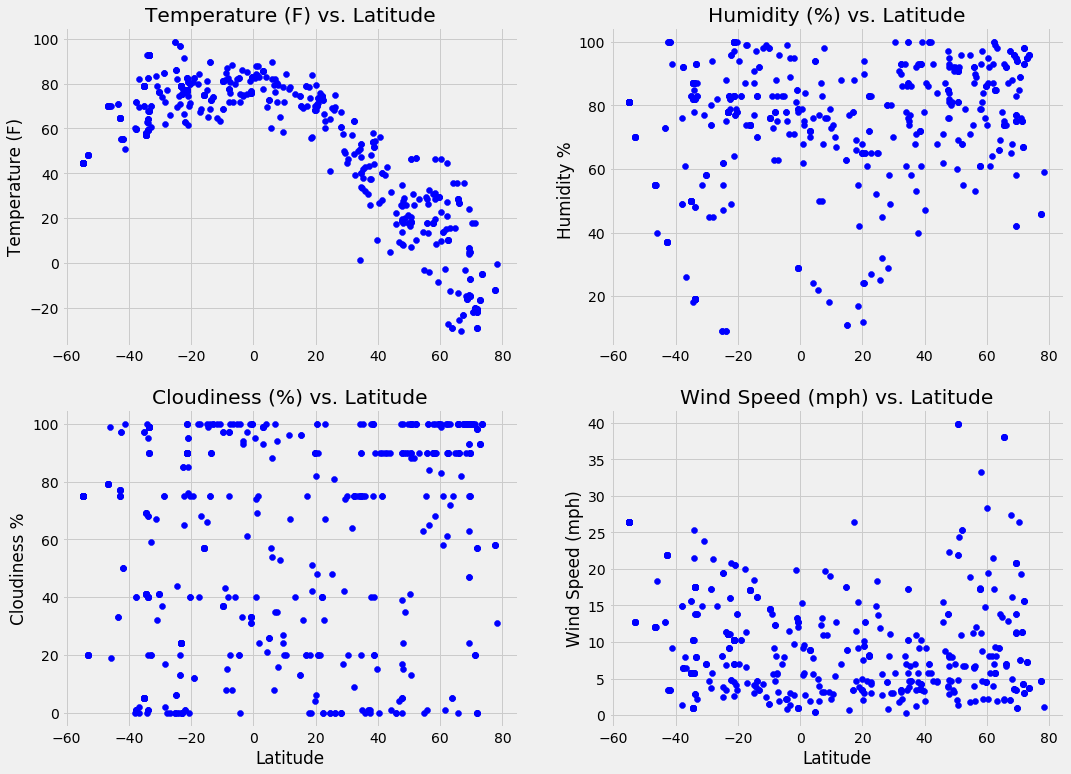

In [7]:
#Create Plots - Use Subplots

# create data for axes
lat   = df1['act_lat'].to_list()
tempF = df1['Temperature_F'].to_list()
humdP = df1['Humidity_Perc'].to_list()
cldyP = df1['Cloudiness_Perc'].to_list()
winsM = df1['Wind_Speed_MPH'].to_list()


#plot data
plt.style.use('fivethirtyeight')
fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots(nrows = 2, ncols = 2,figsize=(16,12))

ax1.scatter(lat,tempF, label = 'TempVLat', c = 'b' )
ax1.set_title('Temperature (F) vs. Latitude')
#ax1.set_xlabel('Latitude')
ax1.set_ylabel('Temperature (F)')

ax2.scatter(lat,humdP, label = 'HumidityVLat' , c = 'b')
ax2.set_title('Humidity (%) vs. Latitude')
#ax2.set_xlabel('Latitude')
ax2.set_ylabel('Humidity % ')

ax3.scatter(lat,cldyP, label = 'CldVLat' , c = 'b')
ax3.set_title('Cloudiness (%) vs. Latitude')
ax3.set_xlabel('Latitude')
ax3.set_ylabel('Cloudiness %')

ax4.scatter(lat,winsM, label = 'WindVLat' , c = 'b')
ax4.set_title('Wind Speed (mph) vs. Latitude')
ax4.set_xlabel('Latitude')
ax4.set_ylabel('Wind Speed (mph)')

#plt.tight_layout()
plt.show()

fig.savefig('img/Latitude_Subplots.png')

In [8]:
#Create a function to plot the different measures vs latitiude in sub plots for Northern and Southern Hemispheres

def plotLatMeasure(cat, msr, x, y, w, z):
    
    """Create sub plots for notheren and southern  of latitudes and some other measure with linear regression
         Keyword arguments:
         cat = description of what is being measured. Used for overall title and export img naming
         msr = label of the measure which is being plotted against latitude
         x = a series of floats containing the northern hemisphere latitude values
         y = a series of floats containing the northern hemisphere measure
         w = a series of floats containing the southern hemisphere latitude values
         z = a series of floats containing the southern hemisphere measure
    
    """
    
    nh_slope, nh_int, nh_r, nh_p, nh_std_err = stats.linregress(
    x, y)
    nh_fit = nh_slope * x + nh_int
    
    sh_slope, sh_int, sh_r, sh_p, st_std_err = stats.linregress(
    w, z)
    sh_fit = sh_slope * w + sh_int


    nh_corr = stats.pearsonr(x,y)
    sh_corr = stats.pearsonr(w,z)
    
    nh_line_eq = "y = " + str(round(nh_slope,2)) + "x + " + str(round(nh_int,2))
    sh_line_eq = "y = " + str(round(sh_slope,2)) + "x + " + str(round(sh_int,2))

    
    # Plot
    fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2,figsize=(14,7))
    fig.suptitle(cat, fontsize=14, fontweight="bold")
    

    ax1.scatter(x, y, linewidth=1, marker="o")
    ax1.plot(x, nh_fit, "b--", linewidth=1)
    plt.text(0.25, 0.15, sh_line_eq, fontweight="bold",fontsize=15, color="b", transform=ax1.transAxes)
    plt.text(0.25, 0.10, "r = " +str(round(nh_corr[0],2)), fontweight="bold",fontsize=15, color="b", transform=ax1.transAxes)
    ax1.set_title('Northern Hemisphere', fontsize=10)
    ax1.set_ylabel(msr, fontsize= 10)
    ax1.set_xlabel('Latitude', fontsize= 10)

    ax2.scatter(w, z, linewidth=1, marker="o", color="r")
    ax2.plot(w, sh_fit, "r--", linewidth=1)
    plt.text(0.25, 0.15, sh_line_eq, fontweight="bold",fontsize=15, color="r", transform=ax2.transAxes)
    plt.text(0.25, 0.10, "r = " +str(round(sh_corr[0],2)), fontweight="bold",fontsize=15, color="r", transform=ax2.transAxes)
    ax2.set_title('Southern Hemisphere', fontsize=10)
    ax2.set_xlabel('Latitude', fontsize= 8)
    
    fig.savefig(f'img/Hemispheres_{msr}_vs_lat.png')
    
    plt.show()

    print(f'Correlation between latitude and {msr}: Northern Hemisphere {round(nh_corr[0],2)}, Southern Hemisphere {round(sh_corr[0],2)}')
 

In [9]:
#Create dataframes for northern and southern hemispheres
nh_DF = df1[df1['rand_lat'] >= 0]
sh_DF = df1[df1['rand_lat'] < 0]

In [10]:
sh_DF.head(2)

,rand_lat,rand_lng,Nearest_City,Country,act_lat,act_lng,Temperature_F,Humidity_Perc,Cloudiness_Perc,Wind_Speed_MPH
0,-19.366399,-131.001443,rikitea,pf,-23.12,-134.97,78.73,78,24,11.1
1,-56.084728,-13.320601,cape town,za,-33.93,18.42,59.09,87,40,5.82


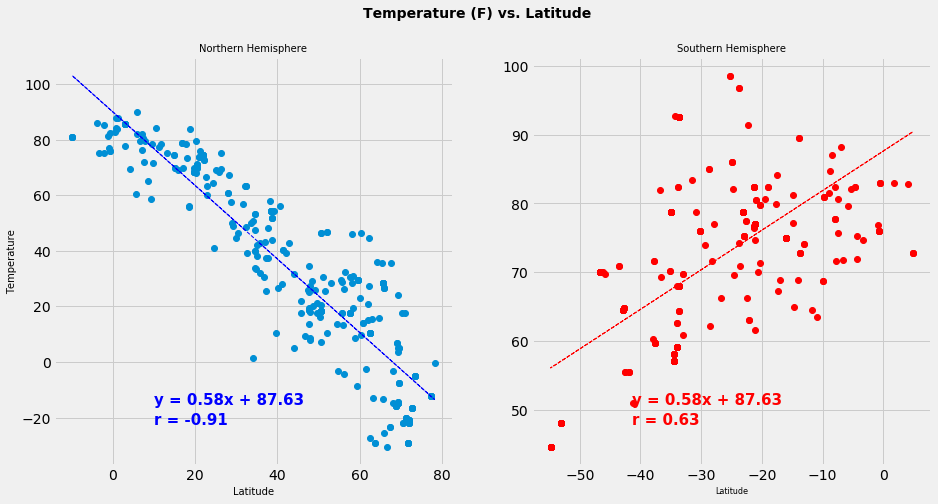

Correlation between latitude and Temperature: Northern Hemisphere -0.91, Southern Hemisphere 0.63


In [11]:
####Temperature (F) vs. Latitude####
cat = 'Temperature (F) vs. Latitude'
msr = 'Temperature'
#Northern Hemisphere 
x = nh_DF.iloc[:, 4].astype(float) #Latitude
y = nh_DF.iloc[:, 6].astype(float) #NH var
#Southern Hemisphere
w = sh_DF.iloc[:, 4].astype(float) #Latitude
z = sh_DF.iloc[:, 6].astype(float) #SH var

plotLatMeasure(cat, msr, x, y, w, z)

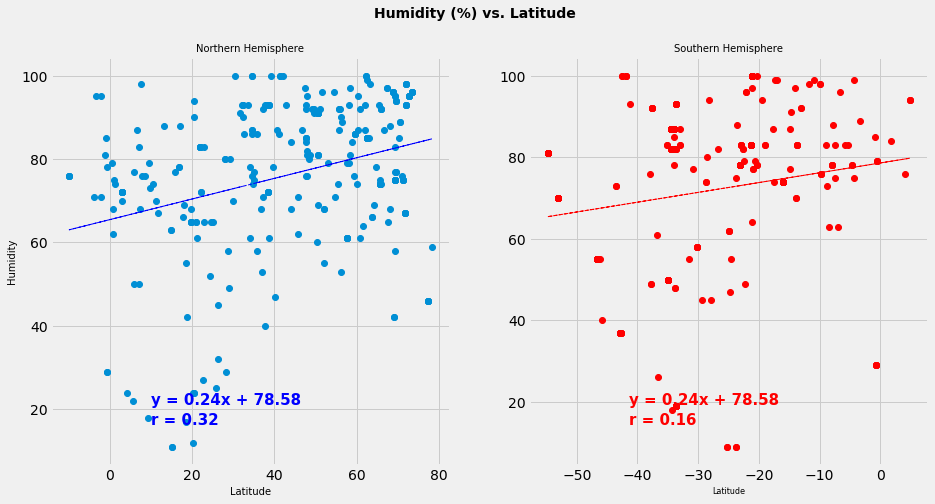

Correlation between latitude and Humidity: Northern Hemisphere 0.32, Southern Hemisphere 0.16


In [12]:
####Humidity (%) vs. Latitude####
cat = 'Humidity (%) vs. Latitude'
msr = 'Humidity'
#Northern Hemisphere 
x = nh_DF.iloc[:, 4].astype(float) #Latitude
y = nh_DF.iloc[:, 7].astype(float) #NH var
#Southern Hemisphere
w = sh_DF.iloc[:, 4].astype(float) #Latitude
z = sh_DF.iloc[:, 7].astype(float) #SH var

plotLatMeasure(cat, msr, x, y, w, z)

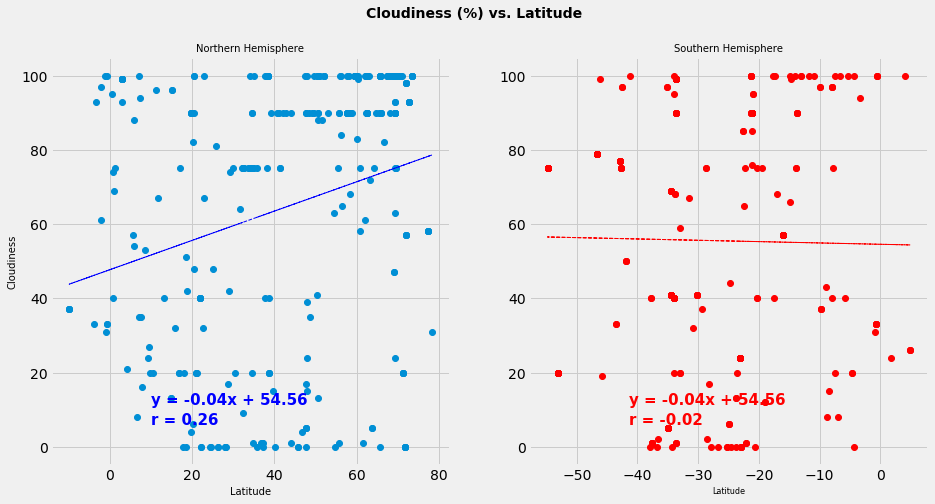

Correlation between latitude and Cloudiness: Northern Hemisphere 0.26, Southern Hemisphere -0.02


In [13]:
####Cloudiness (%) vs. Latitudee####
cat = 'Cloudiness (%) vs. Latitude'
msr = 'Cloudiness'
#Northern Hemisphere 
x = nh_DF.iloc[:, 4].astype(float) #Latitude
y = nh_DF.iloc[:, 8].astype(float) #NH var
#Southern Hemisphere
w = sh_DF.iloc[:, 4].astype(float) #Latitude
z = sh_DF.iloc[:, 8].astype(float) #SH var

plotLatMeasure(cat, msr, x, y, w, z)

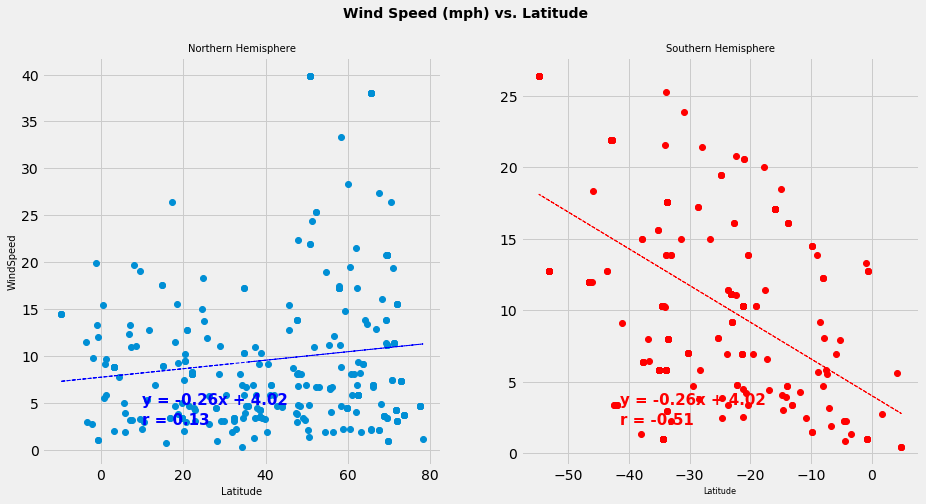

Correlation between latitude and WindSpeed: Northern Hemisphere 0.13, Southern Hemisphere -0.51


In [14]:
####Wind Speed (mph) vs. Latitude####
cat = 'Wind Speed (mph) vs. Latitude'
msr = 'WindSpeed'
#Northern Hemisphere 
x = nh_DF.iloc[:, 4].astype(float) #Latitude
y = nh_DF.iloc[:, 9].astype(float) #NH var
#Southern Hemisphere
w = sh_DF.iloc[:, 4].astype(float) #Latitude
z = sh_DF.iloc[:, 9].astype(float) #SH var

plotLatMeasure(cat, msr, x, y, w, z)

In [15]:
# Export dataframe as a CSV
df1.to_csv('WeatherPY_Data.csv', index=False, header=True)

PermissionError: [Errno 13] Permission denied: 'WeatherPY_Data.csv'